<a href="https://colab.research.google.com/github/sgtgarrido3rm/datascience_ia/blob/main/1_AutoPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Luís Olavo Garrido (Analista de Inteligência Artificial) - Projetos de IA Generativa -> AutoPipeline

In [ ]:
#gpu

In [ ]:
!pip install diffusers transformers safetensors accelerate

In [ ]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image, AutoPipelineForInpainting
from diffusers.utils import load_image
import matplotlib.pyplot as plt
import torch
import requests
from PIL import Image
from io import BytesIO

## Text to image

In [3]:
pretrained_model_or_path = "runwayml/stable-diffusion-v1-5"
prompt = "a car in a street in a big city"
num_inference_steps = 25

In [ ]:
pipeline = AutoPipelineForText2Image.from_pretrained(
    pretrained_model_or_path = pretrained_model_or_path, data_type=torch.float16, use_safetensors=True).to("cuda")

In [ ]:
imagem = pipeline(prompt=prompt,num_inference_steps=num_inference_steps,).images[0]

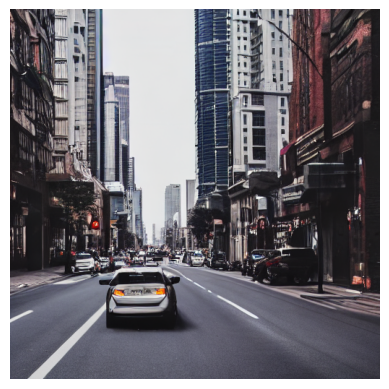

In [6]:
plt.imshow(imagem)
plt.axis('off')
plt.show()

## Image to Image

In [7]:
pretrained_model_or_path = "runwayml/stable-diffusion-v1-5"
prompt = "The woman when she was a child."
num_inference_steps = 80
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg"

In [ ]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    pretrained_model_or_path = pretrained_model_or_path, data_type=torch.float16, use_safetensors=True,
    safety_checker = None).to("cuda")
response = requests.get(url)
imagem = Image.open(BytesIO(response.content)).convert("RGB")

In [ ]:
imagem = pipeline(prompt, imagem, num_inference_steps=num_inference_steps).images[0]

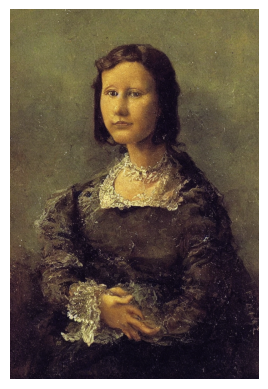

In [11]:
plt.imshow(imagem)
plt.axis('off')
plt.show()

## InPainting

In [12]:
pretrained_model_or_path = "stabilityai/stable-diffusion-xl-base-1.0"
prompt = "Mickey Mouse sitting on a bench"
num_inference_steps = 75
imagem = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mascara = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

In [ ]:
init_image = load_image(imagem).convert("RGB")
mask_image = load_image(mascara).convert("RGB")
pipeline = AutoPipelineForInpainting.from_pretrained(
    pretrained_model_or_path = pretrained_model_or_path, torch_dtype=torch.float16, use_safetensors=True).to("cuda")

In [ ]:
imagem_gen = pipeline(prompt = prompt , image=init_image, mask_image=mask_image, num_inference_steps=num_inference_steps).images[0]

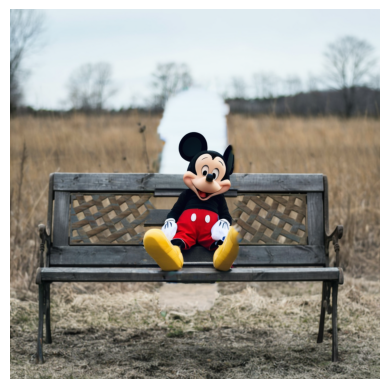

In [23]:
plt.imshow(imagem_gen)
plt.axis('off')
plt.show()